# Optical Character Recognition (OCR)

By Alberto Valdes.

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

This notebook was devoloped in Google Colab.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

### Explanation:

Optical character recognition or optical character reader (OCR) is the electronic or mechanical conversion of images of typed, handwritten or printed text into machine-encoded text, whether from a scanned document, a photo of a document, a scene photo (for example the text on signs and billboards in a landscape photo) or from subtitle text superimposed on an image (for example: from a television broadcast).

$ $

Widely used as a form of data entry from printed paper data records whether passport documents, invoices, bank statements, computerized receipts, business cards, mail, printed data, or any suitable documentation it is a common method of digitizing printed texts so that they can be electronically edited, searched, stored more compactly, displayed online, and used in machine processes such as cognitive computing, machine translation, (extracted) text-to-speech, key data and text mining. OCR is a field of research in pattern recognition, artificial intelligence and computer vision.

$ $

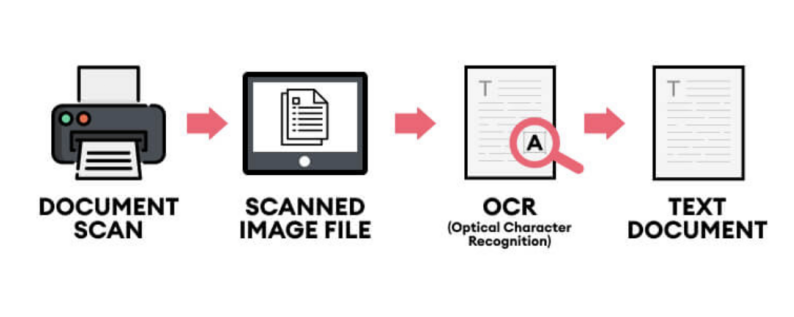

In [5]:
display_img('OCR.png', 10, 10)

# Execution

In [6]:
from PIL import Image
import requests
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

### i. Load model

In [7]:
model_name = "microsoft/trocr-base-handwritten"

In [8]:
processor = TrOCRProcessor.from_pretrained(model_name)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [9]:
model = VisionEncoderDecoderModel.from_pretrained(model_name)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### ii. Load image

In [10]:
url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg"

In [11]:
image = Image.open(requests.get(url, stream = True).raw).convert("RGB")

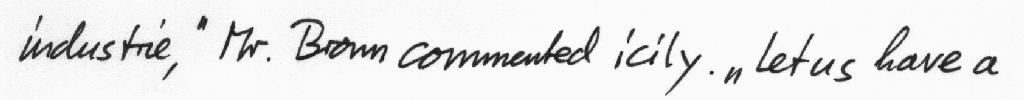

In [12]:
image

### iii. Inference

In [13]:
pixel_values = processor(image, return_tensors = "pt").pixel_values

In [14]:
generated_ids = model.generate(pixel_values)

In [15]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [16]:
generated_text

'industry, " Mr. Brown commented icily. " Let us have a'

### iv. Important

For a particular use you can make a fine-tunning of an OCR model.

### Time of execution

In [17]:
end = time.time()

In [18]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 54 seconds.
